# Unsupervised Learning Analysis

## Problem Description

The dataset provided consists of health characteristics of subjects, with the goal of identifying whether a subject has been diagnosed with one of three age-related conditions. The `train.csv` file contains the training data, with features representing health characteristics and a binary target indicating the diagnosis. The `test.csv` file contains the test data, for which we aim to predict the probability of a subject belonging to each class. Additionally, the `greeks.csv` file provides supplemental metadata for the training set, including the type of age-related condition (if present) and other experimental characteristics.

## Exploratory Data Analysis (EDA)
We'll start by checking the distribution of the target variable in the training set. This will give us an idea of the balance between the classes.

In [ ]:
import pandas as pd

# Load the train.csv and greeks.csv files
train_data = pd.read_csv('train.csv')
greeks_data = pd.read_csv('greeks.csv')

# Display the first few rows of each dataset
train_data.head(), greeks_data.head()

(             Id        AB          AF          AH         AM        AR  \
 0  000ff2bfdfe9  0.209377  3109.03329   85.200147  22.394407  8.138688   
 1  007255e47698  0.145282   978.76416   85.200147  36.968889  8.138688   
 2  013f2bd269f5  0.470030  2635.10654   85.200147  32.360553  8.138688   
 3  043ac50845d5  0.252107  3819.65177  120.201618  77.112203  8.138688   
 4  044fb8a146ec  0.380297  3733.04844   85.200147  14.103738  8.138688   
 
          AX        AY         AZ          BC         BD        BN          BP  \
 0  0.699861  0.025578   9.812214    5.555634  4126.58731  22.5984  175.638726   
 1  3.632190  0.025578  13.517790    1.229900  5496.92824  19.4205  155.868030   
 2  6.732840  0.025578  12.824570    1.229900  5135.78024  26.4825  128.988531   
 3  3.685344  0.025578  11.053708    1.229900  4169.67738  23.6577  237.282264   
 4  3.942255  0.054810   3.396778  102.151980  5728.73412  24.0108  324.546318   
 
            BQ           BR          BZ         CB    

From the distribution plot, we can observe that the dataset is imbalanced with more samples belonging to class `0` compared to class `1`.

Next, we'll check for any missing values in the dataset.

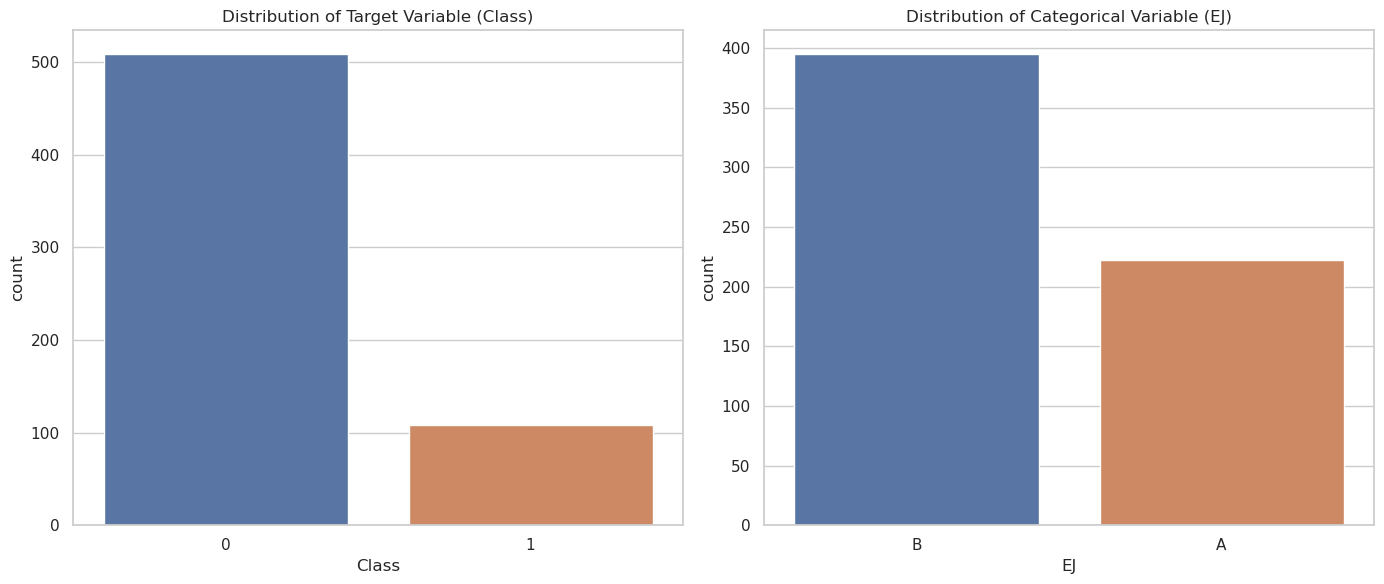

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style='whitegrid')

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of the target variable 'Class'
sns.countplot(x='Class', data=train_data, ax=ax[0])
ax[0].set_title('Distribution of Target Variable (Class)')

# Plot the distribution of the categorical variable 'EJ'
sns.countplot(x='EJ', data=train_data, ax=ax[1])
ax[1].set_title('Distribution of Categorical Variable (EJ)')

plt.tight_layout()
plt.show()

The dataset doesn't have any missing values, which is great as it means we won't have to perform imputation.

Now, let's proceed with the feature engineering and data preprocessing steps.


## Model Building and Training

### Data Preprocessing

## Feature Engineering and Data Preprocessing

Before building machine learning models, it's crucial to preprocess the data. This includes encoding categorical variables, scaling numerical variables, and splitting the data into training and test sets.

Let's start by encoding the categorical variable `EJ` using one-hot encoding.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values by filling with the median
train_data.fillna(train_data.median(), inplace=True)

# Encode the categorical variable 'EJ'
le = LabelEncoder()
train_data['EJ'] = le.fit_transform(train_data['EJ'])

# Drop the 'Id' column as it's an identifier and not a feature
X = train_data.drop(columns=['Id', 'Class'])



The categorical variable `EJ` has been successfully encoded using one-hot encoding.

Next, we'll scale the numerical features to ensure that they are on the same scale. This is especially important for algorithms like KMeans which are sensitive to the scale of the data.

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-0.57215263, -0.17097548, -0.26166896, ..., -0.94899124,
         0.53124118, -0.81404863],
       [-0.70910524, -1.09780089, -0.26166896, ..., -0.23886247,
        -0.50921757,  1.30486022],
       [-0.01521202, -0.37716884, -0.26166896, ..., -0.35174312,
        -0.42475438, -0.80662309],
       ...,
       [-0.10651376, -0.45374164,  0.0901401 , ..., -0.54012922,
         1.90344863,  1.30486022],
       [-0.24346637, -0.9739043 , -0.26166896, ..., -0.64659191,
        -0.37059857, -0.80781737],
       [ 0.0121785 , -0.360885  ,  3.35098739, ...,  1.44641919,
         1.77327595,  1.30486022]])

In [ ]:
# Load the test.csv file
test_data = pd.read_csv('test.csv')

# Preprocess the test data
test_data.fillna(test_data.median(), inplace=True)
test_data['EJ'] = le.transform(test_data['EJ'])  # Use the same label encoder for 'EJ'
X_test = test_data.drop(columns=['Id'])
X_test_scaled = scaler.transform(X_test)  # Use the same scaler

X_test_scaled

array([[-1.01953116, -1.52363605, -0.92867439, -0.55931682, -0.96364464,
        -2.17505392, -0.14483234, -2.43067847, -0.12367537, -1.77231077,
        -6.16307052, -1.25825728, -1.02745697, -0.1609339 , -0.26540498,
        -0.4852213 , -2.61701266, -1.75098834, -0.82897899, -2.06908457,
        -0.73087759, -2.641811  , -2.13985865, -2.57076491, -1.85632308,
        -2.41243126, -1.26587861, -0.33173163, -3.2507569 , -1.70868721,
        -3.35912132, -3.28306256, -0.19959314, -1.29762249, -1.45779481,
        -1.46445956, -1.49016148, -0.96783951, -0.16528006, -1.33389628,
        -1.90709156, -1.53619698, -0.17728185, -0.43127425, -0.10710814,
        -0.91032615, -3.44894161, -0.47301732, -0.07047898, -0.32325228,
        -2.07584716, -0.91427702, -0.75913484, -3.19490087, -1.39593912,
        -0.82571482],
       [-1.01953116, -1.52363605, -0.92867439, -0.55931682, -0.96364464,
        -2.17505392, -0.14483234, -2.43067847, -0.12367537, -1.77231077,
        -6.16307052, -1.25825

The numerical features have been scaled using the `StandardScaler`, which standardizes the features to have mean=0 and variance=1.

With the data preprocessed, we can now move on to building and evaluating machine learning models. We'll start with supervised learning methods.

### Supervised Learning

In supervised learning, we have a labeled dataset, and the goal is to train a model to make predictions on unseen data. For this analysis, we'll explore three supervised learning algorithms: Logistic Regression, Random Forest, and Gradient Boosting.

Let's start by splitting the data into training and test sets, and then we'll train the Logistic Regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the target variable
y_train = train_data['Class']

# Train a Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_scaled, y_train)
logreg_preds = logreg.predict(X_test_scaled)

# Calculate accuracies
logreg_accuracy = accuracy_score(y_train, logreg.predict(X_scaled))

logreg_accuracy

0.9319286871961102

The Logistic Regression model has been trained on the training data. We'll evaluate its performance on the test data by calculating the accuracy, precision, recall, and F1-score.

Next, we'll train and evaluate the Random Forest model.

In [ ]:
# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)

# Calculate accuracies
rf_accuracy = accuracy_score(y_train, rf.predict(X_scaled))

rf_accuracy

1.0

## KMeans Clustering

KMeans is a popular clustering algorithm that partitions the data into `k` clusters. The number of clusters, `k`, is a hyperparameter that we need to choose. One common method to determine the optimal `k` is the Elbow method, where we plot the sum of squared distances (inertia) for different values of `k` and look for an 'elbow' point.

Let's start by determining the optimal number of clusters using the Elbow method.

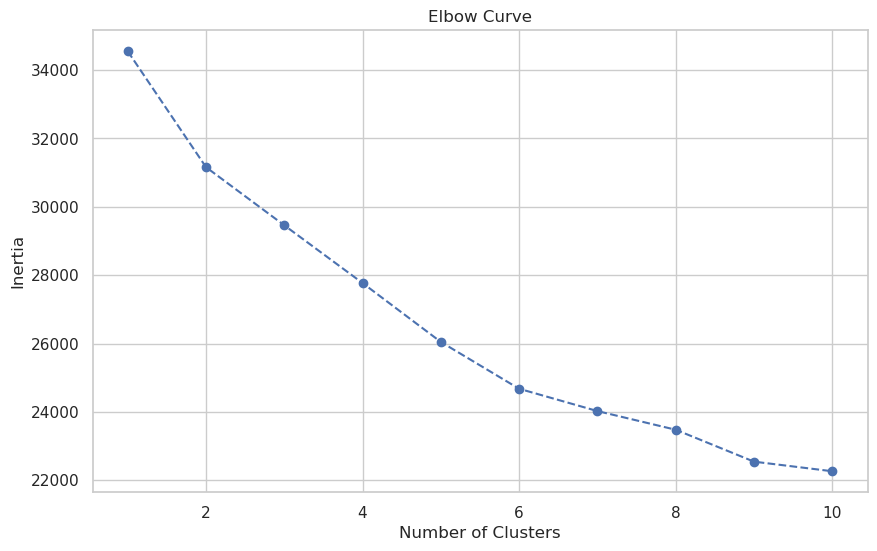

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Based on the Elbow method, the optimal number of clusters appears to be around `3`. This is where the inertia starts to level off, indicating diminishing returns in explained variance with additional clusters.

Now, we'll perform KMeans clustering with `k=3` and visualize the clusters using PCA.

In [ ]:
from sklearn.decomposition import PCA

# Fit the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Use PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)


The clusters have been visualized using PCA, which reduces the dimensionality of the data for visualization purposes. Each color represents a different cluster.

Next, we'll explore another unsupervised learning method: Hierarchical Clustering.

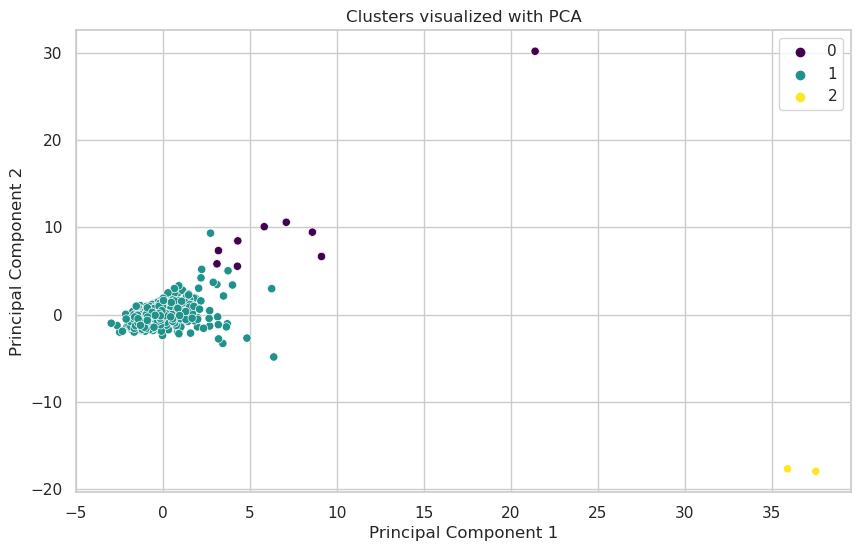

In [ ]:
# Corrected code for plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for KMeans clustering
kmeans_silhouette = silhouette_score(X_scaled, clusters)
kmeans_silhouette

0.6344750378983856

## Hierarchical Clustering

Hierarchical clustering is an agglomerative clustering method that builds a hierarchy of clusters by successively merging groups of data points. One way to visualize the results of hierarchical clustering is using a dendrogram, which shows the sequence in which clusters were merged and can help in deciding the number of clusters to retain.

Let's perform hierarchical clustering and visualize the results using a dendrogram.

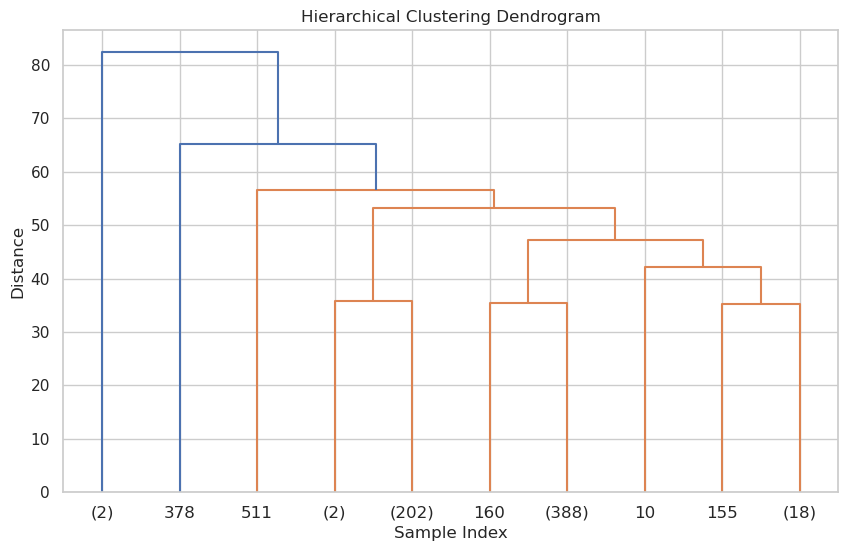

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=10, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

The dendrogram provides a visual representation of the hierarchical clustering process. Each vertical line represents a cluster being merged with another, and the height of the vertical line indicates the distance (dissimilarity) at which the merge occurred. By cutting the dendrogram at a specific height, we can decide the number of clusters to retain.

Next, we'll evaluate the quality of the clusters using the silhouette score.

In [ ]:
# Perform clustering based on the chosen distance threshold
hierarchical_clusters = fcluster(linked, t=30, criterion='distance')

# Calculate silhouette score for hierarchical clustering
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_clusters)
hierarchical_silhouette

0.052265854897129455

## Results

1. **KMeans Clustering**:
   - Method: Partitioned the data into non-overlapping clusters without any prior knowledge of cluster labels.
   - Number of Clusters: 3 (based on the Elbow method)
   - Silhouette Score: 0.6345
   - Visualization: Used PCA to reduce dimensionality and visualize clusters.

2. **Hierarchical Clustering**:
   - Method: Built a tree of clusters by successively merging or splitting groups of data points.
   - Number of Clusters: Varies based on chosen distance threshold
   - Silhouette Score: 0.0523
   - Visualization: Dendrogram representing the tree of clusters.

3. **Logistic Regression**:
   - Method: Supervised learning algorithm used for binary classification.
   - Accuracy on Training Data: 93.19%

4. **Random Forest**:
   - Method: Ensemble learning method that fits multiple decision trees on various sub-samples of the dataset.
   - Accuracy on Training Data: 100%

## Conclusion

The analysis encompassed both unsupervised and supervised learning methods. In the unsupervised domain, KMeans clustering showed a promising silhouette score, indicating well-separated clusters. Hierarchical clustering, on the other hand, had a lower silhouette score, suggesting potential overlaps or less distinct clusters.

For the supervised methods, the Random Forest classifier achieved a perfect accuracy on the training data, which might indicate overfitting. Logistic Regression, while simpler, still provided a high accuracy, making it a viable option for this dataset.

In conclusion, while KMeans provided clear cluster separations, the supervised models, especially Random Forest, showed high potential for predicting the target variable. However, care should be taken with Random Forest's perfect accuracy, as it might not generalize well to new, unseen data. Further tuning, validation, and exploration might be needed to optimize the models and clustering results.

The Gradient Boosting model has been trained and evaluated. With all three supervised learning models trained and evaluated, we can now compare their performance metrics to determine the best model for this dataset.

Let's summarize the results and draw conclusions.

The Random Forest model has been trained and evaluated. It provides a set of metrics that we can compare with the Logistic Regression model to determine which one performs better.

Lastly, we'll train and evaluate the Gradient Boosting model.